In [1]:
import numpy as np

import random

import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import learning_curve

import h5py

import time

import matplotlib.pyplot as plt 

from joblib import dump, load

import tensorflow as tf
#from tensorflow import keras
#from keras.datasets import mnist

import h5py

import numpy as np

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K



2022-03-24 07:21:19.108804: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 07:21:19.108832: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Importation du jeux d'entraînement
f = h5py.File("./datas/train.hdf5", 'r')
train_x, train_y = (f['image'][...])/255.0, f['label'][...]
f.close()

# Importation du jeux de test
f = h5py.File("./datas/test.hdf5", 'r')
test_x, test_y = (f['image'][...])/255.0, f['label'][...]
f.close()

etiquette= np.unique(test_y)
print(f"Entrainement: X Shape: {train_x.shape}, Y shape: {train_y.shape}\n"+\
      f"Test: X Shape: {test_x.shape}, Y shape: {test_y.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (60000, 28, 28), Y shape: (60000,)
Test: X Shape: (10000, 28, 28), Y shape: (10000,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [8]:
X_train= train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])
Y_train= train_y

X_test= test_x.reshape(test_x.shape[0], test_x.shape[1]*test_x.shape[2])
Y_test= test_y

# On réduit le jeux de données original


In [9]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
X_train.max(),X_train.min(), X_test.max(),X_test.min()


(1.0, 0.0, 1.0, 0.0)

In [12]:
# Le jeux de donnée est-il équilibré ?
d= {}
for i in etiquette:
    l= len(train_x[train_y== i])
    d[i]= l
    print(f"Le chiffre {i} est représenté {l} fois", end= " - ")
mini, maxi= min(d, key= d.get), max(d, key= d.get)
print(f"\nLe chiffre le moins représenté est {mini} représenté {d[mini]} fois.")
print(f"Le chiffre le plus représenté est {maxi} représenté {d[maxi]} fois.")

Le chiffre 0 est représenté 5923 fois - Le chiffre 1 est représenté 6742 fois - Le chiffre 2 est représenté 5958 fois - Le chiffre 3 est représenté 6131 fois - Le chiffre 4 est représenté 5842 fois - Le chiffre 5 est représenté 5421 fois - Le chiffre 6 est représenté 5918 fois - Le chiffre 7 est représenté 6265 fois - Le chiffre 8 est représenté 5851 fois - Le chiffre 9 est représenté 5949 fois - 
Le chiffre le moins représenté est 5 représenté 5421 fois.
Le chiffre le plus représenté est 1 représenté 6742 fois.


In [13]:
 model_lreg= LogisticRegression(class_weight='balanced', max_iter=2000, solver='newton-cg')

In [15]:
deb= time.time()
model_lreg.fit(X_train, Y_train)
fin= time.time()
print(f"fit en {fin-deb} s")

fit en 333.402193069458 s


In [16]:
model_lreg.score(X_test,Y_test)

0.9263

In [17]:
def erreur_prediction(valeurs_predites= None, valeurs_reelle= None):
    """
    Vérifie que les valeurs prédites sont les mêmes que les valeurs réelles.
    
    paramètres en entrée:
    valeurs_predites
    valeurs_reelle
    
    Paramètres de sortie:
    erreur: nombre d'erreur de prédiction
    precision: 100*(1-erreur/(longueur des tableaux)
    liste_erreur: Liste de toutes les erreurs détecté sous forme de dictionnaire 
        clé valeur réelle: valeur prédite
    """
    
    assert len(valeurs_predites) == len(valeurs_reelle), "Erreur de dimension: la dimension des tableaux "+\
        f"doit être identique. {len(valeurs_predites)} # de {len(valeurs_reelle)}"

    erreur= 0
    d= {}
    longueur= len(valeurs_reelle)
    for i in range(longueur):
        if valeurs_reelle[i]!= valeurs_predites[i]:
            if valeurs_reelle[i] not in d.keys():
                d[valeurs_reelle[i]]= [valeurs_predites[i]]
            else:
                d[valeurs_reelle[i]].append(valeurs_predites[i])
            erreur+= 1
        
    return erreur, 100*(1-erreur/longueur), d

In [20]:
prediction = model_lreg.predict(X_test)

err, pre, d= erreur_prediction(valeurs_predites= prediction, valeurs_reelle= Y_test)
print(f"{err} erreurs sur {len(X_test)} images soit une précision de {pre:.2f} %")
print(f"Dictionnaire des erreurs (clé valeur réelle: valeur prédite):\n{d}")

737 erreurs sur 10000 images soit une précision de 92.63 %
Dictionnaire des erreurs (clé valeur réelle: valeur prédite):
{5: [6, 7, 3, 0, 8, 3, 8, 8, 3, 7, 8, 9, 3, 4, 3, 8, 3, 6, 7, 6, 3, 0, 8, 0, 3, 3, 4, 9, 8, 8, 8, 4, 8, 3, 2, 8, 7, 3, 8, 0, 3, 3, 2, 0, 7, 7, 9, 9, 4, 0, 8, 4, 8, 0, 2, 3, 3, 3, 1, 6, 8, 8, 4, 3, 8, 6, 3, 8, 6, 8, 8, 1, 3, 3, 3, 3, 3, 3, 8, 3, 8, 8, 3, 6, 4, 8, 6, 8, 3, 6, 8, 8, 8, 4, 4, 8, 8, 3, 6, 3, 3, 3, 6, 6, 0, 0, 6, 6, 3, 6], 4: [6, 6, 2, 9, 9, 9, 9, 8, 9, 1, 6, 9, 6, 9, 9, 9, 3, 7, 3, 6, 8, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 2, 9, 2, 2, 9, 1, 6, 9, 2, 6, 9, 9, 1, 6, 9, 3, 7, 0, 9, 8, 9, 8, 8, 9, 9, 9, 7, 2, 9, 8], 3: [2, 5, 5, 5, 7, 5, 2, 6, 5, 2, 5, 5, 8, 5, 9, 8, 7, 9, 8, 7, 7, 5, 7, 5, 1, 8, 5, 9, 5, 5, 6, 5, 0, 2, 7, 5, 5, 2, 2, 2, 8, 5, 2, 2, 7, 7, 7, 5, 9, 8, 5, 2, 8, 5, 8, 4, 0, 9, 0, 8, 8, 5, 8, 8, 8, 8, 8, 7, 5, 8, 2, 2, 2, 2, 8, 8, 5, 8, 8, 5, 8, 2, 0, 9, 2, 8, 9, 8], 6: [2, 5, 0, 0, 0, 5, 2, 2, 1, 8, 7, 7, 5, 4, 0, 2, 1, 5, 4, 5, 1, 2, 4, 0, 3, 0, 4, 5

In [22]:
target_names= ["détection de 0", "détection de 1", "détection de 2", "détection de 3", "détection de 4",
               "détection de 5", "détection de 6", "détection de 7", "détection de 8", "détection de 9"]
print("\n",classification_report(Y_test,prediction, target_names= target_names)) 

Le score obtenu est de 92.63 % de bonne prédictions

                 precision    recall  f1-score   support

détection de 0       0.95      0.97      0.96       980
détection de 1       0.97      0.98      0.97      1135
détection de 2       0.93      0.90      0.92      1032
détection de 3       0.91      0.91      0.91      1010
détection de 4       0.94      0.94      0.94       982
détection de 5       0.89      0.88      0.89       892
détection de 6       0.94      0.95      0.95       958
détection de 7       0.94      0.92      0.93      1028
détection de 8       0.88      0.88      0.88       974
détection de 9       0.91      0.92      0.92      1009

      accuracy                           0.93     10000
     macro avg       0.93      0.93      0.93     10000
  weighted avg       0.93      0.93      0.93     10000



In [24]:



dump(model_lreg, 'minmax_logreg_newton_balanced 2.modele') 

['minmax_logreg_newton_balanced 2.modele']

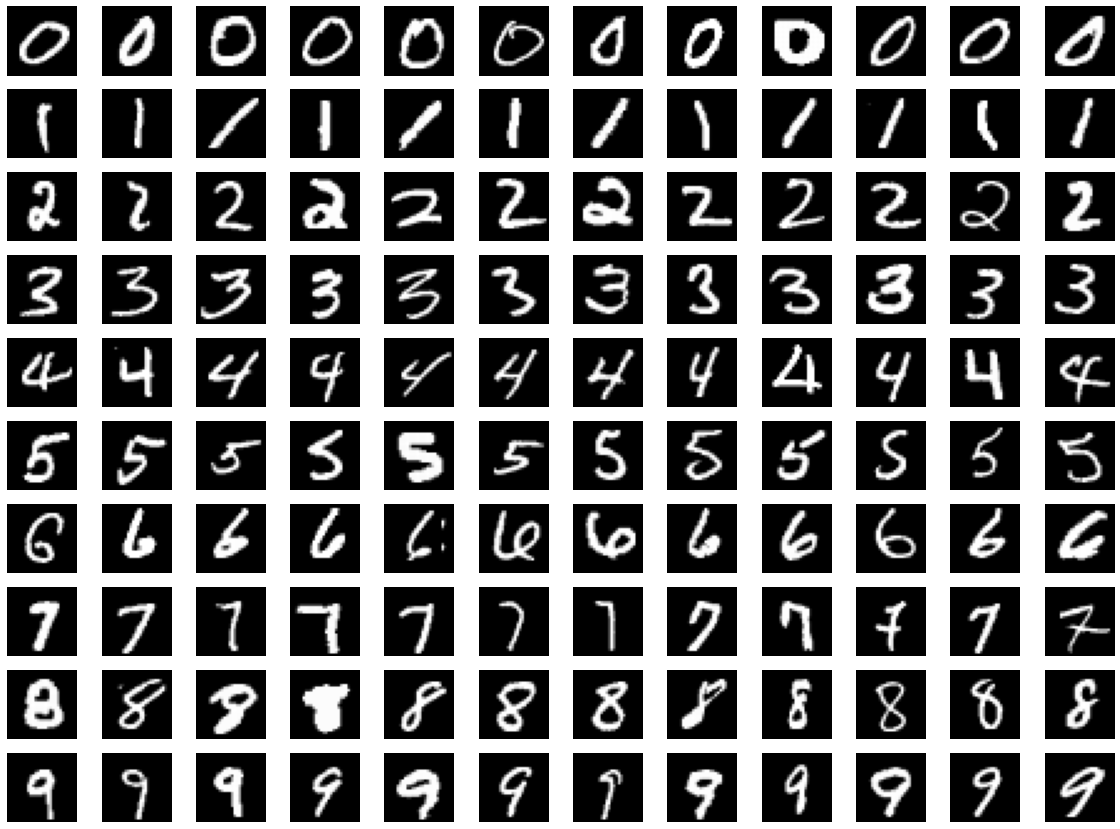

In [59]:
# Préparation de l'affichage
M= 12
fig, axs = plt.subplots(len(etiquette), M, figsize=(20, 15))

# Afficher M exemples de tout les digits (de 0 à 9)
for i, d in enumerate(etiquette):
    x= train_x[train_y == d]
    for j in range(M):
        num= random.randint(0, x.shape[0]-1)        
        axs[i,j].imshow(x[num], cmap="gray")
        axs[i,j].axis('off')


Le chiffre 0 est représenté 5923 fois - Le chiffre 1 est représenté 6742 fois - Le chiffre 2 est représenté 5958 fois - Le chiffre 3 est représenté 6131 fois - Le chiffre 4 est représenté 5842 fois - Le chiffre 5 est représenté 5421 fois - Le chiffre 6 est représenté 5918 fois - Le chiffre 7 est représenté 6265 fois - Le chiffre 8 est représenté 5851 fois - Le chiffre 9 est représenté 5949 fois - 
Le chiffre le moins représenté est 5 représenté 5421 fois.
Le chiffre le plus représenté est 1 représenté 6742 fois.


In [3]:
# On récupère les données. On ne prendra qu'une partie des données situé dans le
#  jeux de train. On en profite pour "applatir" les images
data= train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])

# On réduit le jeux de données original
data_red, _, Y_red, _=  train_test_split(data, train_y, train_size=0.1, random_state= 65)

# On split le jeux de données
X_train_red, X_test_red,  Y_train_red, Y_test_red = train_test_split(data_red, Y_red, train_size=0.8, 
                                                               random_state= 65)

print(f"Entrainement: X Shape: {X_train_red.shape}, Y shape: {Y_train_red.shape}\n"+\
      f"Test: X Shape: {X_test_red.shape}, Y shape: {Y_test_red.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (4800, 784), Y shape: (4800,)
Test: X Shape: (1200, 784), Y shape: (1200,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [4]:
# On réalise un pipe avec 2 actions: un scaler et un algorithme
pipe = Pipeline(steps= [('scaler', StandardScaler()), ('algo', LogisticRegression())])

# On testera 3 standardisations et pour la régression logistique on testera tout les solvers
param_grid = {'pipeline__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
              'pipeline__algo__solver': ["sag", "newton-cg", "lbfgs", "saga"],
              'pipeline__algo__class_weight': ["balanced"],
              'pipeline__algo__max_iter': [2000]}
# instantiate and run as before:

model= make_pipeline(pipe)

grid = GridSearchCV(model, param_grid, cv=5, verbose= True, n_jobs= -1)

grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('algo',
                                                         LogisticRegression())]))]),
             n_jobs=-1,
             param_grid={'pipeline__algo__class_weight': ['balanced'],
                         'pipeline__algo__max_iter': [2000],
                         'pipeline__algo__solver': ['sag', 'newton-cg', 'lbfgs',
                                                    'saga'],
                         'pipeline__scaler': [StandardScaler(), MinMaxScaler(),
                                              RobustScaler()]},
             verbose=True)

In [5]:
deb= time.time()

grid.fit(X_train_red, Y_train_red)

fin= time.time()
print(f"temps d'exécution: {fin-deb:.2f} s")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The m

temps d'exécution: 25717.32 s


/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [6]:
grid.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('algo',
                                  LogisticRegression(class_weight='balanced',
                                                     max_iter=2000,
                                                     solver='newton-cg'))]))])

In [9]:
print(f"Précision obtenu: {100*grid.best_score_:.2f} %")

Précision obtenu: 88.40 %


In [10]:
grid.cv_results_

{'mean_fit_time': array([1827.04314895,  231.22088594, 1876.71221666,   50.39220605,
          28.83537464, 6369.41644335,   39.99096208,   34.12389121,
         205.87793794, 4317.14377704,  846.24480405, 3789.71036057]),
 'std_fit_time': array([ 69.38440553,  19.76828982,  40.31343365,   4.04969178,
          1.04618263, 782.92065579,   1.15738383,   1.59141662,
          9.02821649, 241.04689359,  29.54919976, 491.74400633]),
 'mean_score_time': array([0.03037901, 0.02316012, 0.02717633, 0.02764368, 0.02633514,
        0.03002439, 0.03254666, 0.03047953, 0.04181418, 0.03306494,
        0.02190456, 0.02446933]),
 'std_score_time': array([0.00189925, 0.00016107, 0.00299612, 0.00048742, 0.00187839,
        0.00189033, 0.00155231, 0.00413801, 0.01591045, 0.0098092 ,
        0.00038109, 0.00527098]),
 'param_pipeline__algo__class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced',
                

In [15]:
# on teste sur les données de.... test :)
prediction = grid.predict(X_test_red)
erreur= 0
longueur= len(Y_test_red)
for i in range(longueur):
    if Y_test_red[i]!= prediction[i]: erreur+= 1
print(f"{erreur} erreurs sur {longueur} images soit une précision de {100*(1-erreur/longueur):.2f} %")

111 erreurs sur 1200 images soit une précision de 90.75 %


In [18]:
target_names= ["détection de 0", "détection de 1", "détection de 2", "détection de 3", "détection de 4",
               "détection de 5", "détection de 6", "détection de 7", "détection de 8", "détection de 9"]
print("\n",classification_report(Y_test_red,prediction, target_names= target_names)) 


                 precision    recall  f1-score   support

détection de 0       0.95      0.98      0.96       126
détection de 1       0.93      0.98      0.96       117
détection de 2       0.95      0.83      0.89       137
détection de 3       0.83      0.88      0.85       112
détection de 4       0.93      0.91      0.92       123
détection de 5       0.86      0.84      0.85       103
détection de 6       0.97      0.96      0.97       135
détection de 7       0.91      0.91      0.91       119
détection de 8       0.83      0.87      0.85       110
détection de 9       0.88      0.90      0.89       118

      accuracy                           0.91      1200
     macro avg       0.91      0.91      0.91      1200
  weighted avg       0.91      0.91      0.91      1200



## Validation curve

In [6]:
# On récupère les données. On ne prendra qu'une partie des données situé dans le
#  jeux de train. On en profite pour "applatir" les images
data= train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])

# On réduit le jeux de données original
data_red, _, Y_red, _=  train_test_split(data, train_y, train_size=0.5, random_state= 65)

# On split le jeux de données
X_train_red, X_test_red,  Y_train_red, Y_test_red = train_test_split(data_red, Y_red, train_size=0.8, 
                                                               random_state= 65)

print(f"Entrainement: X Shape: {X_train_red.shape}, Y shape: {Y_train_red.shape}\n"+\
      f"Test: X Shape: {X_test_red.shape}, Y shape: {Y_test_red.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (24000, 784), Y shape: (24000,)
Test: X Shape: (6000, 784), Y shape: (6000,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [8]:
pipe_minmax_logreg= make_pipeline( MinMaxScaler(), 
                                  LogisticRegression(class_weight='balanced', max_iter=2000, solver='newton-cg'))

In [9]:
pipe_minmax_logreg.fit(X_train_red, Y_train_red)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    solver='newton-cg'))])

array([4, 6, 1, ..., 6, 9, 2], dtype=uint8)

In [11]:
prediction = pipe_minmax_logreg.predict(X_test_red)
erreur= 0
longueur= len(Y_test_red)
for i in range(longueur):
    if Y_test_red[i]!= prediction[i]: erreur+= 1
print(f"{erreur} erreurs sur {longueur} images soit une précision de {100*(1-erreur/longueur):.2f} %")

549 erreurs sur 6000 images soit une précision de 90.85 %


In [12]:
train_size, train_score, val_score= learning_curve(pipe_minmax_logreg, X_train_red, Y_train_red, 
                                          train_sizes= np.linspace(0.05,1,15), cv= 3)

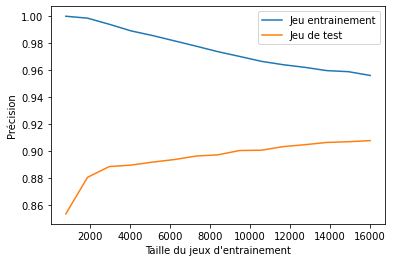

In [13]:
plt.plot(train_size, train_score.mean(axis=1), label= "Jeu entrainement")
plt.plot(train_size, val_score.mean(axis=1), label= "Jeu de test")
plt.xlabel("Taille du jeux d'entrainement")
plt.ylabel("Précision")
_= plt.legend()

In [38]:
def erreur_prediction(valeurs_predites= None, valeurs_reelle= None):
    """
    Vérifie que les valeurs prédites sont les mêmes que les valeurs réelles.
    
    paramètres en entrée:
    valeurs_predites
    valeurs_reelle
    
    Paramètres de sortie:
    erreur: nombre d'erreur de prédiction
    precision: 100*(1-erreur/(longueur des tableaux)
    liste_erreur: Liste de toutes les erreurs détecté sous forme de dictionnaire 
        clé valeur réelle: valeur prédite
    """
    
    assert len(valeurs_predites) == len(valeurs_reelle), "Erreur de dimension: la dimension des tableaux "+\
        f"doit être identique. {len(valeurs_predites)} # de {len(valeurs_reelle)}"

    erreur= 0
    d= {}
    longueur= len(valeurs_reelle)
    for i in range(longueur):
        if valeurs_reelle[i]!= valeurs_predites[i]:
            if valeurs_reelle[i] not in d.keys():
                d[valeurs_reelle[i]]= [valeurs_predites[i]]
            else:
                d[valeurs_reelle[i]].append(valeurs_predites[i])
            erreur+= 1
        
    return erreur, 100*(1-erreur/longueur), d

In [36]:
err, pre, d= erreur_prediction(valeurs_predites= [1,1,2,0,4,1], valeurs_reelle= [1,2,2,3,2,2])

In [37]:
print(f"{err} erreurs. précision {pre:.2f} % dictionnaire: {d}")

4 erreurs. précision 33.33 % dictionnaire: {2: [1, 4, 1], 3: [0]}


In [165]:
# On récupère les données. On ne prendra qu'une partie des données situé dans le
#  jeux de train. On en profite pour "applatir" les images
data= train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])

# On réduit le jeux de données original
data_red, _, Y_red, _=  train_test_split(data, train_y, train_size=0.8, random_state= 65)

# On split le jeux de données
X_train_red, X_test_red,  Y_train_red, Y_test_red = train_test_split(data_red, Y_red, train_size=0.8, 
                                                               random_state= 65)

print(f"Entrainement: X Shape: {X_train_red.shape}, Y shape: {Y_train_red.shape}\n"+\
      f"Test: X Shape: {X_test_red.shape}, Y shape: {Y_test_red.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (38400, 784), Y shape: (38400,)
Test: X Shape: (9600, 784), Y shape: (9600,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [152]:
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

model_knn= make_pipeline(MinMaxScaler(),KNeighborsClassifier())
# On testera 3 standardisations et pour la régression logistique on testera tout les solvers
param_grid_algo = {'kneighborsclassifier__n_neighbors': [6],
                   'kneighborsclassifier__weights': ["distance"],
                   'kneighborsclassifier__algorithm': ["ball_tree"],
                   #'kneighborsclassifier__leaf_size': [20],
                    #'kneighborsclassifier__p': [5],
             }

# __sgdclassifier
# __kneighborsregressor
# LogisticRegression(max_iter= 1000)
# max_iter= 1000, tol= 1e-3
# n_neighbors= 7

In [166]:
model_knn

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [167]:

# instantiate and run as before:

#model_algo= make_pipeline(pipe_algo)

grid_algo = GridSearchCV(model_knn, param_grid_algo, cv=5, verbose= True, n_jobs= -1)

grid_algo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['ball_tree'],
                         'kneighborsclassifier__n_neighbors': [6],
                         'kneighborsclassifier__weights': ['distance']},
             verbose=True)

In [155]:
grid_algo.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__minmaxscaler', 'estimator__kneighborsclassifier', 'estimator__minmaxscaler__clip', 'estimator__minmaxscaler__copy', 'estimator__minmaxscaler__feature_range', 'estimator__kneighborsclassifier__algorithm', 'estimator__kneighborsclassifier__leaf_size', 'estimator__kneighborsclassifier__metric', 'estimator__kneighborsclassifier__metric_params', 'estimator__kneighborsclassifier__n_jobs', 'estimator__kneighborsclassifier__n_neighbors', 'estimator__kneighborsclassifier__p', 'estimator__kneighborsclassifier__weights', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [168]:
deb= time.time()

grid_algo.fit(X_train_red, Y_train_red)

fin= time.time()
print(f"temps d'exécution: {fin-deb:.2f} s")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
temps d'exécution: 653.75 s


In [157]:
grid_algo.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6,
                                      weights='distance'))])

In [158]:
grid_algo.best_score_

0.9464583333333334

In [ ]:
0.9491666666666665 3,25
0.9497916666666667

In [164]:
prediction = model_knn.predict(X_test_red)

err, pre, d= erreur_prediction(valeurs_predites= prediction, valeurs_reelle= Y_test_red)
print(f"{err} erreurs sur {len(Y_test_red)} images soit une précision de {pre:.2f} %")
print(f"Dictionnaire des erreurs (clé valeur réelle: valeur prédite):\n{d}")

120 erreurs sur 2400 images soit une précision de 95.00 %
Dictionnaire des erreurs (clé valeur réelle: valeur prédite):
{3: [7, 5, 8, 8, 2, 8, 2, 1, 4, 1, 5, 7, 9, 9], 7: [5, 1, 9, 4, 9, 9, 9, 9, 9, 9, 4, 1, 9, 9, 4, 4, 4, 1], 5: [3, 1, 0, 6, 6, 3, 2, 1, 3, 3, 0, 1, 7, 9, 3, 6, 6], 6: [5, 0, 0, 1, 0, 5, 0, 5], 9: [4, 7, 3, 3, 7, 4, 7, 3, 4, 7, 4], 8: [1, 1, 1, 5, 1, 3, 3, 2, 4, 4, 5, 5, 4, 5, 5, 9, 5, 5, 2, 1, 2, 1, 5], 2: [7, 8, 5, 1, 1, 7, 7, 7, 8, 1, 1, 6, 0, 0, 1, 5, 4, 0, 7], 4: [1, 1, 9, 1, 9], 0: [2, 2, 8, 6], 1: [7]}


In [148]:
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

model_sgd= make_pipeline(MinMaxScaler(),SGDClassifier())
# On testera 3 standardisations et pour la régression logistique on testera tout les solvers
param_grid_algo = {#'sgdclassifier__n_neighbors': [6],
                   'sgdclassifier__class_weight': ["balanced", None],
                   #'sgdclassifier__algorithm': ["ball_tree"],
                   #'sgdclassifier__leaf_size': [20],
                    #'sgdclassifier__p': [5],
             }


In [149]:

grid_algo = GridSearchCV(model_sgd, param_grid_algo, cv=5, verbose= True, n_jobs= -1)

grid_algo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('sgdclassifier', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'sgdclassifier__class_weight': ['balanced', None]},
             verbose=True)

In [150]:
deb= time.time()

grid_algo.fit(X_train_red, Y_train_red)

fin= time.time()
print(f"temps d'exécution: {fin-deb:.2f} s")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
temps d'exécution: 29.41 s


In [151]:
grid_algo.best_score_

0.878125

2022-03-23 08:06:06.122821: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-23 08:06:06.122865: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# On récupère les données et on les met en forme pour qu'elles soient compatible avec le CNN.
# la dimension des données de test et de train sont de type:
#  (shape[0],shape[1], shape[2]), il sera nécessaire d'y ajouter une dimension supplémentaire
data_train_pour_cnn= train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
data_test_pour_cnn= test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)

etiquette= np.unique(test_y)

# convert class vectors to binary class matrices
train_y_conv = keras.utils.to_categorical(train_y, len(etiquette))
test_y_conv = keras.utils.to_categorical(test_y, len(etiquette))


print(f"Entrainement: X Shape: {data_train_pour_cnn.shape}, Y shape: {train_y.shape}\n"+\
      f"Test: X Shape: {data_test_pour_cnn.shape}, Y shape: {test_y.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (60000, 28, 28, 1), Y shape: (60000,)
Test: X Shape: (10000, 28, 28, 1), Y shape: (10000,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [4]:
batch_size = 128
epochs = 10

input_shape= (train_x.shape[1], train_x.shape[2], 1)
nb_classe= len(etiquette)

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape= input_shape ))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classe, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


2022-03-19 11:10:04.679796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-19 11:10:04.679951: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-19 11:10:04.680043: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debian-jpphi): /proc/driver/nvidia/version does not exist
2022-03-19 11:10:04.680999: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
checkpoint_path = "./cp-{epoch:04d}.ckpt"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath= checkpoint_path, 
    verbose=1, 
    save_weights_only= True,
    save_freq=5*batch_size)


In [6]:
# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))


In [2]:
# Importation du jeux d'entraînement
f = h5py.File("./datas/train.hdf5", 'r')
train_x, train_y = (f['image'][...])/255.0, f['label'][...]
f.close()

# Importation du jeux de test
f = h5py.File("./datas/test.hdf5", 'r')
test_x, test_y = (f['image'][...])/255.0, f['label'][...]
f.close()



In [7]:
hist = model.fit(data_train_pour_cnn, train_y_conv, batch_size=batch_size, epochs=epochs, 
                 verbose=1,validation_data=(data_test_pour_cnn, test_y_conv), workers= -1, 
                 callbacks=[cp_callback])

#print("The model has successfully trained")
model.save(f'mnist_{epochs}')
#print("Saving the model as mnist.h5")
print("sauvegarde du modèle.")

2022-03-19 11:10:09.828401: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 [==============================] - 232s 488ms/step - loss: 2.2750 - accuracy: 0.2069 - val_loss: 2.2347 - val_accuracy: 0.3213
Epoch 2/10
170/469 [=========>....................] - ETA: 2:27 - loss: 2.2294 - accuracy: 0.2993
Epoch 00002: saving model to ./cp-0002.ckpt
469/469 [==============================] - 252s 537ms/step - loss: 2.2061 - accuracy: 0.3327 - val_loss: 2.1583 - val_accuracy: 0.4233
Epoch 3/10
341/469 [====================>.........] - ETA: 59s - loss: 2.1390 - accuracy: 0.4147
Epoch 00003: saving model to ./cp-0003.ckpt
469/469 [==============================] - 229s 488ms/step - loss: 2.1261 - accuracy: 0.4275 - val_loss: 2.0640 - val_accuracy: 0.5431
Epoch 4/10
469/469 [==============================] - 264s 562ms/step - loss: 2.0237 - accuracy: 0.5120 - val_loss: 1.9410 - val_accuracy: 0.6245
Epoch 5/10
 43/469 [=>............................] - ETA: 3:45 - loss: 1.9545 - accuracy: 0.5489
Epoch 00005: saving model to ./cp-0005.ckpt
469/469 [====

2022-03-19 12:00:41.223404: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: mnist_10/assets
sauvegarde du modèle.


In [8]:
batch_size = 128
epochs = 10

input_shape= (train_x.shape[1], train_x.shape[2], 1)
nb_classe= len(etiquette)

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape= input_shape ))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classe, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                      

In [12]:
latest = tf.train.latest_checkpoint("./")


model.load_weights(latest)

hist2 = model.fit(data_train_pour_cnn, train_y_conv, batch_size=batch_size, epochs=epochs, 
                 verbose=1,validation_data=(data_test_pour_cnn, test_y_conv), workers= -1)

#print("The model has successfully trained")
model.save(f'mnist_{epochs}')
#print("Saving the model as mnist.h5")
print("sauvegarde du modèle.")

2022-03-19 14:04:48.085056: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 [==============================] - 299s 632ms/step - loss: 0.9731 - accuracy: 0.7505 - val_loss: 0.8189 - val_accuracy: 0.8251
Epoch 2/10
469/469 [==============================] - 504s 1s/step - loss: 0.8803 - accuracy: 0.7626 - val_loss: 0.7302 - val_accuracy: 0.8354
Epoch 3/10
469/469 [==============================] - 408s 870ms/step - loss: 0.8045 - accuracy: 0.7766 - val_loss: 0.6626 - val_accuracy: 0.8445
Epoch 4/10
469/469 [==============================] - 272s 579ms/step - loss: 0.7449 - accuracy: 0.7907 - val_loss: 0.6099 - val_accuracy: 0.8524
Epoch 5/10
469/469 [==============================] - 238s 507ms/step - loss: 0.6996 - accuracy: 0.7999 - val_loss: 0.5685 - val_accuracy: 0.8588
Epoch 6/10
469/469 [==============================] - 253s 539ms/step - loss: 0.6641 - accuracy: 0.8060 - val_loss: 0.5353 - val_accuracy: 0.8641
Epoch 7/10
469/469 [==============================] - 318s 679ms/step - loss: 0.6321 - accuracy: 0.8152 - val_loss: 0.5080 - va

In [22]:
import os
os.listdir("./")

['sujet_brief5_handw.md',
 'mnist_CNN_C32-33C64-33Mp22FD256D10_Ep251.h5',
 'mnist_CNN_C16-33C32-33Mp22FD128Do20D10_Ep120.h5',
 'mnist.h5',
 'mnist_CNN_C32-33C64-33Mp22Do25FD256Do50D10_Ep250.h5',
 'lecture_cp.py',
 'test.hdf5',
 'test.hdf5.zip',
 'minmax_logreg_newton_balanced.modele',
 '.ipynb_checkpoints',
 'test code',
 'minmax_knn6_distance_balltreep3.modele',
 'mnist_101.h5',
 'train.hdf5',
 'train.hdf5.zip',
 'E2test2.ipynb',
 'E2_baseb5.ipynb']

In [13]:
model.save(f'mnist.h5')

In [15]:
epochs= 100
model = keras.models.load_model('mnist_101.h5')

hist3 = model.fit(data_train_pour_cnn, train_y_conv, batch_size=batch_size, epochs=epochs, 
                 verbose=1,validation_data=(data_test_pour_cnn, test_y_conv), workers= -1)

#print("The model has successfully trained")
model.save(f'mnist_{epochs}2.h5')
#print("Saving the model as mnist.h5")
print("sauvegarde du modèle.")

2022-03-19 22:21:55.395393: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100
469/469 [==============================] - 120s 253ms/step - loss: 0.4392 - accuracy: 0.8688 - val_loss: 0.3475 - val_accuracy: 0.9038
Epoch 2/100
469/469 [==============================] - 118s 252ms/step - loss: 0.4338 - accuracy: 0.8709 - val_loss: 0.3420 - val_accuracy: 0.9040
Epoch 3/100
469/469 [==============================] - 155s 330ms/step - loss: 0.4268 - accuracy: 0.8715 - val_loss: 0.3373 - val_accuracy: 0.9056
Epoch 4/100
469/469 [==============================] - 175s 373ms/step - loss: 0.4231 - accuracy: 0.8730 - val_loss: 0.3324 - val_accuracy: 0.9065
Epoch 5/100
469/469 [==============================] - 189s 404ms/step - loss: 0.4145 - accuracy: 0.8753 - val_loss: 0.3279 - val_accuracy: 0.9073
Epoch 6/100
469/469 [==============================] - 144s 307ms/step - loss: 0.4061 - accuracy: 0.8769 - val_loss: 0.3234 - val_accuracy: 0.9089
Epoch 7/100
469/469 [==============================] - 135s 287ms/step - loss: 0.4038 - accuracy: 0.8794 - val_loss: 0

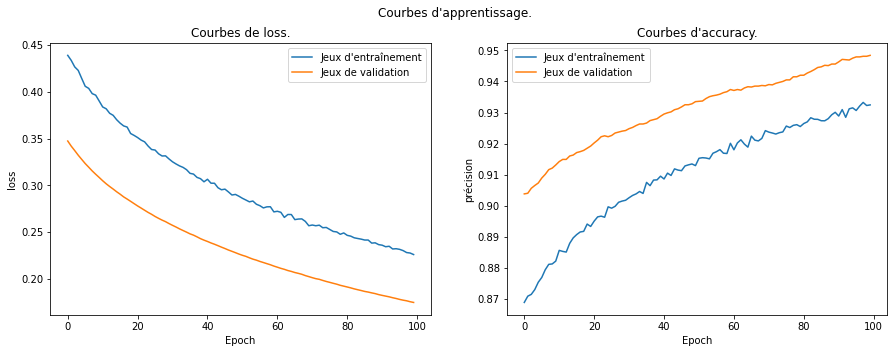

In [19]:
import matplotlib.pyplot as plt

debut= 0
x= [x for x in range(len(hist3.history["loss"]))]

fig, axes= plt.subplots(1, 2, figsize= (15,5))
fig.suptitle("Courbes d'apprentissage.")
axes[0].plot(x[debut:], hist3.history["loss"][debut:], label="Jeux d'entraînement")
axes[0].plot(x[debut:],hist3.history["val_loss"][debut:], label="Jeux de validation")
axes[0].set_title("Courbes de loss.")
axes[0].set(xlabel= "Epoch", ylabel="loss")
axes[0].legend()

axes[1].plot(x[debut:],hist3.history["accuracy"][debut:], label="Jeux d'entraînement")
axes[1].plot(x[debut:],hist3.history["val_accuracy"][debut:], label="Jeux de validation")
axes[1].set_title("Courbes d'accuracy.")
axes[1].set(xlabel= "Epoch", ylabel="précision")
_= axes[1].legend()

In [2]:
d={'loss': [22.571229934692383,
  10.335871696472168,
  6.109948635101318,
  4.1272125244140625,
  3.1016037464141846,
  2.4336371421813965,
  2.041743278503418,
  1.7853261232376099,
  1.6038233041763306,
  1.458308219909668,
  1.3760160207748413,
  1.2875343561172485,
  1.2264832258224487,
  1.1609575748443604,
  1.121896743774414,
  1.0787242650985718,
  1.0318491458892822,
  0.9977041482925415,
  0.9545130133628845,
  0.9364075660705566,
  0.8979724049568176,
  0.8775693774223328,
  0.8555898666381836,
  0.8221238255500793,
  0.8000975847244263,
  0.7885547280311584,
  0.7681276202201843,
  0.7530555129051208,
  0.7319848537445068,
  0.7208031415939331,
  0.7034688591957092,
  0.6904558539390564,
  0.6759500503540039,
  0.6622772812843323,
  0.6488083600997925,
  0.6314892172813416,
  0.6228706240653992,
  0.6187745332717896,
  0.5985718369483948,
  0.5916908979415894,
  0.5722251534461975,
  0.580276608467102,
  0.5594924092292786,
  0.555302083492279,
  0.5417608022689819,
  0.5354365706443787,
  0.523945152759552,
  0.519014835357666,
  0.5158577561378479,
  0.4992319643497467,
  0.4984670579433441,
  0.4874868392944336,
  0.4824014902114868,
  0.4747413396835327,
  0.47210371494293213,
  0.4600667953491211,
  0.4546281397342682,
  0.44230836629867554,
  0.4515077769756317,
  0.44907838106155396,
  0.43689295649528503,
  0.4338133931159973,
  0.4160824418067932,
  0.42480432987213135,
  0.4172985553741455,
  0.40939339995384216,
  0.40631940960884094,
  0.39994436502456665,
  0.3923366069793701,
  0.3902750611305237,
  0.3859991133213043,
  0.3875753581523895,
  0.37908703088760376,
  0.37722721695899963,
  0.3759789764881134,
  0.3657592833042145,
  0.3627775013446808,
  0.3617583215236664,
  0.3536018133163452,
  0.3550317585468292,
  0.34497272968292236,
  0.3405953049659729,
  0.34537187218666077,
  0.3392258286476135,
  0.3393239378929138,
  0.33574652671813965,
  0.3273515999317169,
  0.32560503482818604,
  0.3220316767692566,
  0.3208162188529968,
  0.3173814117908478,
  0.31309974193573,
  0.3119923770427704,
  0.3120967745780945,
  0.3102223873138428,
  0.3036940097808838,
  0.30120325088500977,
  0.30065223574638367,
  0.298307329416275,
  0.295396625995636,
  0.29126542806625366,
  0.2908851206302643,
  0.2889742851257324,
  0.28735247254371643,
  0.28434428572654724,
  0.2763824462890625,
  0.2790781259536743,
  0.2759306728839874,
  0.2721720337867737,
  0.2753470242023468,
  0.27135398983955383,
  0.26709622144699097,
  0.26515883207321167,
  0.26399174332618713,
  0.2650022506713867,
  0.2581033706665039,
  0.26098665595054626,
  0.2582728862762451,
  0.26054856181144714,
  0.25188666582107544,
  0.2529369592666626,
  0.2511942684650421,
  0.2484438121318817,
  0.24308809638023376,
  0.24545450508594513,
  0.2492080181837082,
  0.2468338906764984,
  0.23913659155368805,
  0.23953895270824432,
  0.2367609441280365,
  0.2422270029783249,
  0.23594450950622559,
  0.23479217290878296,
  0.23172472417354584,
  0.22821305692195892,
  0.22727654874324799,
  0.22396329045295715,
  0.22607867419719696,
  0.2236178070306778,
  0.22751115262508392,
  0.22147159278392792,
  0.21871577203273773,
  0.2227349430322647,
  0.2192428708076477,
  0.21826471388339996,
  0.21498441696166992,
  0.21339920163154602,
  0.21217504143714905,
  0.2123773992061615,
  0.2115698903799057,
  0.21043212711811066,
  0.20961105823516846,
  0.20906615257263184,
  0.2039128690958023,
  0.20526400208473206,
  0.20645500719547272,
  0.20263008773326874,
  0.19836729764938354,
  0.1989881992340088,
  0.20229390263557434,
  0.20132537186145782,
  0.1982845813035965,
  0.19469791650772095,
  0.19626320898532867,
  0.196788489818573,
  0.19283917546272278,
  0.1970822960138321,
  0.18769556283950806,
  0.19411765038967133,
  0.19014285504817963,
  0.19087620079517365,
  0.18811053037643433,
  0.18524670600891113,
  0.1865449696779251,
  0.18232013285160065,
  0.18410730361938477,
  0.17757755517959595,
  0.18537765741348267,
  0.17992641031742096,
  0.1798526793718338,
  0.18243567645549774,
  0.17947164177894592,
  0.17801135778427124,
  0.17529979348182678,
  0.1756168156862259,
  0.17679807543754578,
  0.1763361692428589,
  0.17852026224136353,
  0.17050957679748535,
  0.16796477138996124,
  0.1714116483926773,
  0.17167720198631287,
  0.16723336279392242,
  0.16891609132289886,
  0.16874544322490692,
  0.16735504567623138,
  0.16677559912204742,
  0.16374513506889343,
  0.16801704466342926,
  0.16283190250396729,
  0.16497312486171722,
  0.16380763053894043,
  0.16186784207820892,
  0.16010025143623352,
  0.15797856450080872,
  0.16611401736736298,
  0.15758571028709412,
  0.15639418363571167,
  0.1588117927312851,
  0.15944801270961761,
  0.15445105731487274,
  0.15779000520706177,
  0.1550067812204361,
  0.15386302769184113,
  0.15753403306007385,
  0.15765541791915894,
  0.15355759859085083,
  0.15044479072093964,
  0.15291817486286163,
  0.1552068293094635,
  0.1487315148115158,
  0.15337781608104706,
  0.1497904360294342,
  0.1505456566810608,
  0.1533621847629547,
  0.1531863808631897,
  0.1495659202337265,
  0.14895060658454895,
  0.14714747667312622,
  0.1471671164035797,
  0.148018941283226,
  0.14718399941921234,
  0.1448180228471756,
  0.14542318880558014,
  0.14796355366706848,
  0.1468690037727356,
  0.14289595186710358,
  0.14092375338077545,
  0.1412864327430725,
  0.14173370599746704,
  0.14008599519729614,
  0.14077959954738617,
  0.13930021226406097,
  0.13948489725589752,
  0.14315178990364075,
  0.13522018492221832,
  0.13667328655719757,
  0.13636359572410583,
  0.13732314109802246,
  0.13888046145439148],
 'accuracy': [0.17578333616256714,
  0.34564998745918274,
  0.45855000615119934,
  0.5215666890144348,
  0.5545499920845032,
  0.5786833167076111,
  0.5866833329200745,
  0.5913000106811523,
  0.604533314704895,
  0.614383339881897,
  0.6303166747093201,
  0.6432666778564453,
  0.6559833288192749,
  0.6691333055496216,
  0.6802499890327454,
  0.6917499899864197,
  0.7032166719436646,
  0.7111499905586243,
  0.7249333262443542,
  0.7304499745368958,
  0.7404999732971191,
  0.7483500242233276,
  0.7539666891098022,
  0.7615333199501038,
  0.7699000239372253,
  0.7752500176429749,
  0.7796833515167236,
  0.7840333580970764,
  0.7902666926383972,
  0.7928666472434998,
  0.798383355140686,
  0.8014833331108093,
  0.8052166700363159,
  0.8120166659355164,
  0.8148166537284851,
  0.8197833299636841,
  0.8204666376113892,
  0.8238000273704529,
  0.8289333581924438,
  0.8317166566848755,
  0.8352000117301941,
  0.8339999914169312,
  0.8393666744232178,
  0.8429333567619324,
  0.8451333045959473,
  0.8460333347320557,
  0.8509666919708252,
  0.851016640663147,
  0.8532666563987732,
  0.8566499948501587,
  0.8590666651725769,
  0.8612499833106995,
  0.8631666898727417,
  0.8641666769981384,
  0.8648999929428101,
  0.8692833185195923,
  0.8701833486557007,
  0.8729333281517029,
  0.8705000281333923,
  0.8737833499908447,
  0.8745333552360535,
  0.8780166506767273,
  0.8810666799545288,
  0.8785333037376404,
  0.8825666904449463,
  0.8830999732017517,
  0.883983314037323,
  0.8858333230018616,
  0.8863833546638489,
  0.8888000249862671,
  0.8902333378791809,
  0.8896166682243347,
  0.8920666575431824,
  0.892549991607666,
  0.8931333422660828,
  0.895466685295105,
  0.8954166769981384,
  0.8968166708946228,
  0.8982666730880737,
  0.8974499702453613,
  0.9002833366394043,
  0.9020500183105469,
  0.9013166427612305,
  0.9020833373069763,
  0.9035833477973938,
  0.9051333069801331,
  0.9064833521842957,
  0.9064499735832214,
  0.9078166484832764,
  0.9077666401863098,
  0.9082499742507935,
  0.9104833602905273,
  0.909766674041748,
  0.9115333557128906,
  0.9105833172798157,
  0.9136833548545837,
  0.9139999747276306,
  0.9135500192642212,
  0.9156666398048401,
  0.9155499935150146,
  0.9156500101089478,
  0.9168499708175659,
  0.9179166555404663,
  0.9185500144958496,
  0.9195333123207092,
  0.9198333621025085,
  0.9199333190917969,
  0.9215333461761475,
  0.9213333129882812,
  0.921833336353302,
  0.9229666590690613,
  0.9235000014305115,
  0.923966646194458,
  0.9246000051498413,
  0.9237666726112366,
  0.9267666935920715,
  0.9251499772071838,
  0.9252333045005798,
  0.9261999726295471,
  0.9268166422843933,
  0.9269833564758301,
  0.928933322429657,
  0.9292333126068115,
  0.9301499724388123,
  0.9290500283241272,
  0.9282666444778442,
  0.9295166730880737,
  0.9300833344459534,
  0.9310500025749207,
  0.9319833517074585,
  0.9312333464622498,
  0.9316499829292297,
  0.9332333207130432,
  0.933566689491272,
  0.9336666464805603,
  0.9349499940872192,
  0.9347833395004272,
  0.9348499774932861,
  0.9351500272750854,
  0.9347000122070312,
  0.9362499713897705,
  0.9362999796867371,
  0.9361500144004822,
  0.9374666810035706,
  0.9376166462898254,
  0.9378166794776917,
  0.9387333393096924,
  0.9380999803543091,
  0.939633309841156,
  0.9394500255584717,
  0.9395999908447266,
  0.9394999742507935,
  0.9394833445549011,
  0.9406999945640564,
  0.9411333203315735,
  0.9403833150863647,
  0.9417333602905273,
  0.9422666430473328,
  0.9426833391189575,
  0.941016674041748,
  0.9421666860580444,
  0.9421833157539368,
  0.9436666369438171,
  0.9429500102996826,
  0.9444833397865295,
  0.944350004196167,
  0.9429333209991455,
  0.9451833367347717,
  0.9433333277702332,
  0.9443833231925964,
  0.9452333450317383,
  0.9456499814987183,
  0.9464166760444641,
  0.9455666542053223,
  0.9461833238601685,
  0.9458833336830139,
  0.9477999806404114,
  0.9467999935150146,
  0.947516679763794,
  0.9475833177566528,
  0.9483000040054321,
  0.9476500153541565,
  0.9482499957084656,
  0.9493499994277954,
  0.9495333433151245,
  0.948366641998291,
  0.9492499828338623,
  0.948033332824707,
  0.9503999948501587,
  0.9506833553314209,
  0.9502500295639038,
  0.9502500295639038,
  0.9513833522796631,
  0.9509833455085754,
  0.9513499736785889,
  0.9506000280380249,
  0.9507833123207092,
  0.9522500038146973,
  0.9512166380882263,
  0.9524499773979187,
  0.9505000114440918,
  0.9518666863441467,
  0.9521166682243347,
  0.9528833627700806,
  0.9540166854858398,
  0.9520833492279053,
  0.9538333415985107,
  0.9542166590690613,
  0.9521999955177307,
  0.9537500143051147,
  0.9549499750137329,
  0.9536166787147522,
  0.9548500180244446,
  0.9561166763305664,
  0.9541500210762024,
  0.9550833106040955,
  0.9549000263214111,
  0.9561499953269958,
  0.9552000164985657,
  0.9550833106040955,
  0.9560999870300293,
  0.9559000134468079,
  0.9571999907493591,
  0.9561333060264587,
  0.9549333453178406,
  0.9555666446685791,
  0.9563666582107544,
  0.956683337688446,
  0.9567166566848755,
  0.9572499990463257,
  0.956083357334137,
  0.9580833315849304,
  0.957099974155426,
  0.9578499794006348,
  0.9573666453361511,
  0.9571166634559631,
  0.958133339881897,
  0.9581999778747559,
  0.9587833285331726,
  0.9584833383560181,
  0.9589333534240723,
  0.9578333497047424,
  0.9589999914169312,
  0.9594333171844482,
  0.9584333300590515,
  0.9598666429519653,
  0.9599499702453613,
  0.9598166942596436,
  0.9598833322525024,
  0.9592333436012268],
 'val_loss': [3.031341314315796,
  1.5699903964996338,
  1.0497677326202393,
  0.7776825428009033,
  0.6439451575279236,
  0.6056201457977295,
  0.6140367984771729,
  0.6350357532501221,
  0.6557522416114807,
  0.6547847390174866,
  0.6481831073760986,
  0.6264583468437195,
  0.6074733138084412,
  0.579046368598938,
  0.553992748260498,
  0.529743492603302,
  0.5051908493041992,
  0.4870063066482544,
  0.4659081995487213,
  0.4488614797592163,
  0.42676079273223877,
  0.4111696779727936,
  0.3950824439525604,
  0.38081082701683044,
  0.3665113151073456,
  0.3582788407802582,
  0.3464433252811432,
  0.3384303152561188,
  0.3304852843284607,
  0.3197755515575409,
  0.3119647800922394,
  0.3054560422897339,
  0.2980692982673645,
  0.29203084111213684,
  0.2845522165298462,
  0.27637308835983276,
  0.26948094367980957,
  0.2657376825809479,
  0.25997260212898254,
  0.2543179988861084,
  0.2505413591861725,
  0.24574440717697144,
  0.2408403605222702,
  0.2363845705986023,
  0.23154672980308533,
  0.2278728485107422,
  0.22292949259281158,
  0.21943798661231995,
  0.21661514043807983,
  0.21243813633918762,
  0.2081778347492218,
  0.20444804430007935,
  0.20085109770298004,
  0.19767050445079803,
  0.19493651390075684,
  0.19196482002735138,
  0.18806864321231842,
  0.1852509081363678,
  0.18288055062294006,
  0.18175843358039856,
  0.17855945229530334,
  0.1758742332458496,
  0.17315948009490967,
  0.17167021334171295,
  0.1697779893875122,
  0.1676325798034668,
  0.16541962325572968,
  0.16345477104187012,
  0.161615788936615,
  0.15938511490821838,
  0.15756450593471527,
  0.15535525977611542,
  0.15353776514530182,
  0.1520182341337204,
  0.1499948650598526,
  0.14813609421253204,
  0.14680637419223785,
  0.1449691355228424,
  0.14304989576339722,
  0.14179463684558868,
  0.14036481082439423,
  0.13872858881950378,
  0.13727016746997833,
  0.13587906956672668,
  0.13430863618850708,
  0.13323929905891418,
  0.13211265206336975,
  0.13078759610652924,
  0.12960490584373474,
  0.12813253700733185,
  0.12705162167549133,
  0.12598645687103271,
  0.12507428228855133,
  0.12387549132108688,
  0.12283327430486679,
  0.12178769707679749,
  0.12089131772518158,
  0.11983587592840195,
  0.11853891611099243,
  0.11754690110683441,
  0.1167646273970604,
  0.11573144793510437,
  0.11469423770904541,
  0.1134658232331276,
  0.11255492269992828,
  0.1117669939994812,
  0.11100040376186371,
  0.11028022319078445,
  0.10936801880598068,
  0.1081220805644989,
  0.10745365917682648,
  0.10687244683504105,
  0.10606618970632553,
  0.10532866418361664,
  0.10453664511442184,
  0.10381867736577988,
  0.1031174436211586,
  0.10204331576824188,
  0.10130175948143005,
  0.10066673904657364,
  0.09991008788347244,
  0.09938462823629379,
  0.09871770441532135,
  0.09806669503450394,
  0.09751610457897186,
  0.09701088815927505,
  0.09631764143705368,
  0.09572737663984299,
  0.09511946886777878,
  0.09466475993394852,
  0.09394030272960663,
  0.0934094563126564,
  0.09262581914663315,
  0.09214980155229568,
  0.0915430560708046,
  0.09110689908266068,
  0.0906534492969513,
  0.08999553322792053,
  0.08945480734109879,
  0.08898906409740448,
  0.08836733549833298,
  0.08781008422374725,
  0.08718053996562958,
  0.08675672113895416,
  0.08618535101413727,
  0.08581068366765976,
  0.08524076640605927,
  0.08486384153366089,
  0.08436303585767746,
  0.08389611542224884,
  0.08353693038225174,
  0.08322854340076447,
  0.08282335847616196,
  0.08223509043455124,
  0.08178862929344177,
  0.08149821311235428,
  0.08109918981790543,
  0.08077280968427658,
  0.08040028810501099,
  0.08007082343101501,
  0.07974860072135925,
  0.07947584986686707,
  0.0791444182395935,
  0.07856368273496628,
  0.07811081409454346,
  0.0775468498468399,
  0.07717055082321167,
  0.07695940881967545,
  0.07665159553289413,
  0.07623490691184998,
  0.07584399729967117,
  0.07555040717124939,
  0.07503439486026764,
  0.07477319985628128,
  0.07428228855133057,
  0.07390613108873367,
  0.07362920790910721,
  0.07329487055540085,
  0.07312452793121338,
  0.0728532075881958,
  0.07247147709131241,
  0.07206699997186661,
  0.07176759093999863,
  0.07142528891563416,
  0.07123075425624847,
  0.07082061469554901,
  0.07051169127225876,
  0.07029270380735397,
  0.06980574876070023,
  0.06962636858224869,
  0.06952233612537384,
  0.06928159296512604,
  0.06915459036827087,
  0.06873907893896103,
  0.06841115653514862,
  0.0682339072227478,
  0.06809186190366745,
  0.06769560277462006,
  0.06734767556190491,
  0.06719991564750671,
  0.06705415993928909,
  0.06683734804391861,
  0.06652384996414185,
  0.06619293987751007,
  0.06590990722179413,
  0.0657239779829979,
  0.06532961130142212,
  0.06523773074150085,
  0.06495457887649536,
  0.06477101147174835,
  0.06468566507101059,
  0.06446430087089539,
  0.06425376236438751,
  0.06409706920385361,
  0.06385045498609543,
  0.06362196803092957,
  0.06338892877101898,
  0.06304365396499634,
  0.06282585859298706,
  0.06266450881958008,
  0.06252395361661911,
  0.06228814646601677,
  0.062058936804533005,
  0.06196163222193718,
  0.06179120019078255,
  0.06163713335990906,
  0.06126817688345909,
  0.06101376190781593,
  0.060826610773801804,
  0.060617804527282715,
  0.06048405170440674,
  0.060302238911390305,
  0.060186609625816345,
  0.06011736020445824,
  0.05989125370979309,
  0.059747520834207535,
  0.059465229511260986,
  0.0593511126935482,
  0.059119854122400284,
  0.059014324098825455,
  0.0587654784321785,
  0.058509185910224915,
  0.05839913338422775,
  0.0582449696958065,
  0.05810728296637535,
  0.05798839032649994,
  0.057756517082452774,
  0.05757756903767586,
  0.057356707751750946,
  0.05704180896282196],
 'val_accuracy': [0.5719000101089478,
  0.7361999750137329,
  0.7853999733924866,
  0.8057000041007996,
  0.8147000074386597,
  0.8169000148773193,
  0.8159000277519226,
  0.8167999982833862,
  0.8169000148773193,
  0.8216000199317932,
  0.8284000158309937,
  0.8367999792098999,
  0.8424000144004822,
  0.8515999913215637,
  0.857699990272522,
  0.8655999898910522,
  0.871999979019165,
  0.8770999908447266,
  0.883899986743927,
  0.8878999948501587,
  0.8924999833106995,
  0.8949999809265137,
  0.8988000154495239,
  0.9006999731063843,
  0.9057000279426575,
  0.9074000120162964,
  0.9103000164031982,
  0.9111999869346619,
  0.9136000275611877,
  0.9161999821662903,
  0.9182999730110168,
  0.9199000000953674,
  0.9225999712944031,
  0.923799991607666,
  0.9271000027656555,
  0.9286999702453613,
  0.9301000237464905,
  0.9307000041007996,
  0.9320999979972839,
  0.9347000122070312,
  0.9347000122070312,
  0.9351999759674072,
  0.9362000226974487,
  0.9387999773025513,
  0.9397000074386597,
  0.9408000111579895,
  0.941100001335144,
  0.9419999718666077,
  0.9427000284194946,
  0.9435999989509583,
  0.9449999928474426,
  0.9453999996185303,
  0.946399986743927,
  0.9470000267028809,
  0.9473999738693237,
  0.9480000138282776,
  0.9488000273704529,
  0.9498999714851379,
  0.9498999714851379,
  0.9514999985694885,
  0.9521999955177307,
  0.9527999758720398,
  0.9534000158309937,
  0.9545000195503235,
  0.9549999833106995,
  0.9557999968528748,
  0.9560999870300293,
  0.9556000232696533,
  0.9560999870300293,
  0.957099974155426,
  0.9577999711036682,
  0.9577999711036682,
  0.9584000110626221,
  0.958299994468689,
  0.9595999717712402,
  0.9596999883651733,
  0.9602000117301941,
  0.9606999754905701,
  0.9610999822616577,
  0.9613000154495239,
  0.9624000191688538,
  0.9620000123977661,
  0.9617000222206116,
  0.9625999927520752,
  0.9631999731063843,
  0.9629999995231628,
  0.9628999829292297,
  0.9634000062942505,
  0.9641000032424927,
  0.9642000198364258,
  0.9639000296592712,
  0.9642000198364258,
  0.9646999835968018,
  0.9646000266075134,
  0.9642999768257141,
  0.964900016784668,
  0.9653000235557556,
  0.9653000235557556,
  0.9659000039100647,
  0.9661999940872192,
  0.9666000008583069,
  0.9666000008583069,
  0.9668999910354614,
  0.9670000076293945,
  0.9675999879837036,
  0.9678999781608582,
  0.9681000113487244,
  0.9685999751091003,
  0.968999981880188,
  0.9693999886512756,
  0.9695000052452087,
  0.9697999954223633,
  0.9700000286102295,
  0.9703999757766724,
  0.9710000157356262,
  0.9710999727249146,
  0.9708999991416931,
  0.9717000126838684,
  0.9718000292778015,
  0.9717000126838684,
  0.972100019454956,
  0.972000002861023,
  0.9721999764442444,
  0.9721999764442444,
  0.9725000262260437,
  0.9728000164031982,
  0.9728000164031982,
  0.9728000164031982,
  0.9728999733924866,
  0.9731000065803528,
  0.9732999801635742,
  0.9731000065803528,
  0.9735999703407288,
  0.9739999771118164,
  0.9735999703407288,
  0.9736999869346619,
  0.9740999937057495,
  0.974399983882904,
  0.974399983882904,
  0.9743000268936157,
  0.9746999740600586,
  0.974399983882904,
  0.9745000004768372,
  0.9746000170707703,
  0.9745000004768372,
  0.9740999937057495,
  0.9746000170707703,
  0.9745000004768372,
  0.9746000170707703,
  0.9747999906539917,
  0.9751999974250793,
  0.9751999974250793,
  0.975600004196167,
  0.9750999808311462,
  0.9753000140190125,
  0.9753999710083008,
  0.9760000109672546,
  0.9761000275611877,
  0.9764000177383423,
  0.9760000109672546,
  0.9760000109672546,
  0.9757999777793884,
  0.9761999845504761,
  0.9761999845504761,
  0.9764999747276306,
  0.9764999747276306,
  0.9764999747276306,
  0.9768000245094299,
  0.9772999882698059,
  0.9771000146865845,
  0.9769999980926514,
  0.9771999716758728,
  0.9772999882698059,
  0.9775999784469604,
  0.9776999950408936,
  0.9775999784469604,
  0.9775999784469604,
  0.9776999950408936,
  0.9775999784469604,
  0.9779999852180481,
  0.9778000116348267,
  0.9779999852180481,
  0.9782000184059143,
  0.9782000184059143,
  0.9782999753952026,
  0.9782999753952026,
  0.9785000085830688,
  0.9786999821662903,
  0.9785000085830688,
  0.978600025177002,
  0.9789000153541565,
  0.9787999987602234,
  0.9789999723434448,
  0.9790999889373779,
  0.9790999889373779,
  0.979200005531311,
  0.9794999957084656,
  0.9796000123023987,
  0.9793999791145325,
  0.9797000288963318,
  0.9794999957084656,
  0.9797999858856201,
  0.9797999858856201,
  0.9799000024795532,
  0.9800000190734863,
  0.9801999926567078,
  0.9801999926567078,
  0.9803000092506409,
  0.9801999926567078,
  0.9804999828338623,
  0.980400025844574,
  0.9805999994277954,
  0.9807999730110168,
  0.9803000092506409,
  0.9803000092506409,
  0.9803000092506409,
  0.9805999994277954,
  0.9804999828338623,
  0.9807999730110168,
  0.9807000160217285,
  0.9807999730110168,
  0.9807999730110168,
  0.9811000227928162,
  0.98089998960495,
  0.9810000061988831,
  0.9810000061988831,
  0.9810000061988831,
  0.9811000227928162,
  0.9812999963760376,
  0.9810000061988831,
  0.9811000227928162,
  0.9811999797821045,
  0.9811999797821045,
  0.9814000129699707,
  0.9815000295639038,
  0.9814000129699707,
  0.9817000031471252,
  0.9817000031471252,
  0.9817000031471252,
  0.9819999933242798,
  0.9818000197410583,
  0.9817000031471252,
  0.9821000099182129,
  0.9819999933242798,
  0.9818000197410583,
  0.9819999933242798,
  0.9817000031471252,
  0.9821000099182129,
  0.982200026512146,
  0.9825000166893005]}



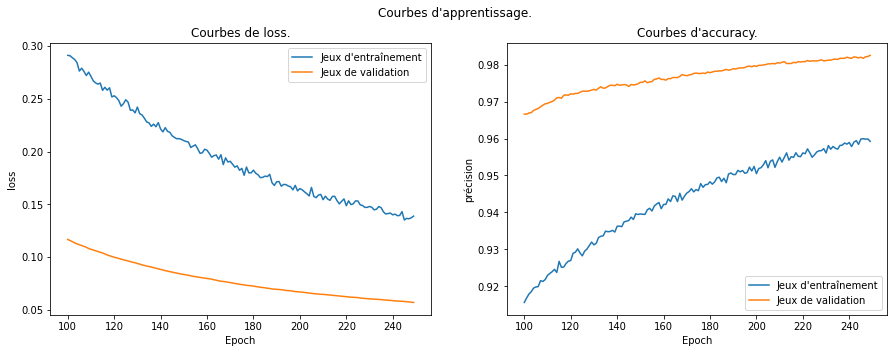

In [6]:
x= range(len(d["loss"]))

fig, axes= plt.subplots(1, 2, figsize= (15,5))
fig.suptitle("Courbes d'apprentissage.")
axes[0].plot(x[100:], d["loss"][100:], label="Jeux d'entraînement")
axes[0].plot(x[100:],d["val_loss"][100:], label="Jeux de validation")
axes[0].set_title("Courbes de loss.")
axes[0].set(xlabel= "Epoch", ylabel="loss")
axes[0].legend()

axes[1].plot(x[100:],d["accuracy"][100:], label="Jeux d'entraînement")
axes[1].plot(x[100:],d["val_accuracy"][100:], label="Jeux de validation")
axes[1].set_title("Courbes d'accuracy.")
axes[1].set(xlabel= "Epoch", ylabel="précision")
_= axes[1].legend()

In [3]:
# Importation du jeux d'entraînement
f = h5py.File("./datas/train.hdf5", 'r')
train_x, train_y = (f['image'][...])/255.0, f['label'][...]
f.close()

# Importation du jeux de test
f = h5py.File("./datas/test.hdf5", 'r')
test_x, test_y = (f['image'][...])/255.0, f['label'][...]
f.close()



In [4]:
# On récupère les données et on les met en forme pour qu'elles soient compatible avec le CNN.
# la dimension des données de test et de train sont de type:
#  (shape[0],shape[1], shape[2]), il sera nécessaire d'y ajouter une dimension supplémentaire
data_train_pour_cnn= train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
data_test_pour_cnn= test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)

etiquette= np.unique(test_y)

# convert class vectors to binary class matrices
train_y_conv = keras.utils.to_categorical(train_y, len(etiquette))
test_y_conv = keras.utils.to_categorical(test_y, len(etiquette))


print(f"Entrainement: X Shape: {data_train_pour_cnn.shape}, Y shape: {train_y.shape}\n"+\
      f"Test: X Shape: {data_test_pour_cnn.shape}, Y shape: {test_y.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (60000, 28, 28, 1), Y shape: (60000,)
Test: X Shape: (10000, 28, 28, 1), Y shape: (10000,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [5]:
batch_size = 128
epochs = 200

input_shape= (train_x.shape[1], train_x.shape[2], 1)
nb_classe= len(etiquette)

model2 = Sequential()

model2.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape= input_shape ))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(nb_classe, activation='softmax'))
model2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model2.summary()

2022-03-20 21:20:30.348334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-20 21:20:30.348426: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-20 21:20:30.348491: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debian-jpphi): /proc/driver/nvidia/version does not exist
2022-03-20 21:20:30.349461: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

In [ ]:
model2= 

In [6]:

historique = model2.fit(data_train_pour_cnn, train_y_conv, batch_size=batch_size, epochs=epochs, 
                 verbose=1,validation_data=(data_test_pour_cnn, test_y_conv), workers= -1)

#print("The model has successfully trained")
model2.save(f'mnist_{epochs}.modele')
#print("Saving the model as mnist.h5")
print("sauvegarde du modèle.")

2022-03-20 21:20:56.505016: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/200


2022-03-20 21:20:59.871155: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22003200 exceeds 10% of free system memory.
2022-03-20 21:20:59.871392: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22003200 exceeds 10% of free system memory.
2022-03-20 21:20:59.954978: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24883200 exceeds 10% of free system memory.
2022-03-20 21:20:59.955852: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24883200 exceeds 10% of free system memory.


469/469 [==============================] - 135s 282ms/step - loss: 2.3061 - accuracy: 0.0993 - val_loss: 2.2966 - val_accuracy: 0.1048
Epoch 2/200
469/469 [==============================] - 133s 284ms/step - loss: 2.2918 - accuracy: 0.1351 - val_loss: 2.2828 - val_accuracy: 0.1945
Epoch 3/200
469/469 [==============================] - 130s 278ms/step - loss: 2.2761 - accuracy: 0.1787 - val_loss: 2.2673 - val_accuracy: 0.2968
Epoch 4/200
469/469 [==============================] - 130s 277ms/step - loss: 2.2590 - accuracy: 0.2220 - val_loss: 2.2489 - val_accuracy: 0.3715
Epoch 5/200
469/469 [==============================] - 135s 288ms/step - loss: 2.2388 - accuracy: 0.2707 - val_loss: 2.2266 - val_accuracy: 0.4426
Epoch 6/200
469/469 [==============================] - 146s 311ms/step - loss: 2.2130 - accuracy: 0.3163 - val_loss: 2.1983 - val_accuracy: 0.5129
Epoch 7/200
469/469 [==============================] - 126s 268ms/step - loss: 2.1814 - accuracy: 0.3575 - val_loss: 2.1617 - val_

469/469 [==============================] - 128s 272ms/step - loss: 0.3017 - accuracy: 0.9065 - val_loss: 0.2089 - val_accuracy: 0.9397
Epoch 112/200
469/469 [==============================] - 129s 275ms/step - loss: 0.2999 - accuracy: 0.9080 - val_loss: 0.2071 - val_accuracy: 0.9398
Epoch 113/200
469/469 [==============================] - 135s 288ms/step - loss: 0.3004 - accuracy: 0.9100 - val_loss: 0.2058 - val_accuracy: 0.9406
Epoch 114/200
469/469 [==============================] - 141s 302ms/step - loss: 0.2962 - accuracy: 0.9102 - val_loss: 0.2044 - val_accuracy: 0.9407
Epoch 115/200
469/469 [==============================] - 123s 262ms/step - loss: 0.2984 - accuracy: 0.9076 - val_loss: 0.2035 - val_accuracy: 0.9415
Epoch 116/200
469/469 [==============================] - 124s 264ms/step - loss: 0.2940 - accuracy: 0.9099 - val_loss: 0.2019 - val_accuracy: 0.9411
Epoch 117/200
469/469 [==============================] - 124s 263ms/step - loss: 0.2929 - accuracy: 0.9099 - val_loss: 0

469/469 [==============================] - 128s 272ms/step - loss: 0.2309 - accuracy: 0.9287 - val_loss: 0.1542 - val_accuracy: 0.9535
Epoch 167/200
469/469 [==============================] - 128s 273ms/step - loss: 0.2302 - accuracy: 0.9294 - val_loss: 0.1535 - val_accuracy: 0.9538
Epoch 168/200
469/469 [==============================] - 150s 319ms/step - loss: 0.2311 - accuracy: 0.9296 - val_loss: 0.1531 - val_accuracy: 0.9542
Epoch 169/200
469/469 [==============================] - 123s 262ms/step - loss: 0.2310 - accuracy: 0.9293 - val_loss: 0.1524 - val_accuracy: 0.9545
Epoch 170/200
469/469 [==============================] - 124s 264ms/step - loss: 0.2268 - accuracy: 0.9296 - val_loss: 0.1517 - val_accuracy: 0.9540
Epoch 171/200
469/469 [==============================] - 123s 263ms/step - loss: 0.2269 - accuracy: 0.9305 - val_loss: 0.1508 - val_accuracy: 0.9545
Epoch 172/200
469/469 [==============================] - 124s 264ms/step - loss: 0.2274 - accuracy: 0.9296 - val_loss: 0

2022-03-21 04:29:42.958982: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: mnist_200/assets
sauvegarde du modèle.


In [7]:
historique.history

{'loss': [2.3061065673828125,
  2.2917771339416504,
  2.27614164352417,
  2.2590174674987793,
  2.238802671432495,
  2.21299409866333,
  2.1814160346984863,
  2.1400442123413086,
  2.085916042327881,
  2.018521547317505,
  1.9317365884780884,
  1.8286138772964478,
  1.7095668315887451,
  1.5812666416168213,
  1.4579883813858032,
  1.349447250366211,
  1.2536414861679077,
  1.175964117050171,
  1.106194257736206,
  1.0473577976226807,
  0.9999394416809082,
  0.9559064507484436,
  0.913645327091217,
  0.8772290349006653,
  0.8476569056510925,
  0.8197755217552185,
  0.7987787127494812,
  0.7691942453384399,
  0.7498995661735535,
  0.7258330583572388,
  0.7093181610107422,
  0.6944416761398315,
  0.678104817867279,
  0.6627307534217834,
  0.6464785933494568,
  0.6325347423553467,
  0.6198845505714417,
  0.6130788326263428,
  0.6004114151000977,
  0.5887990593910217,
  0.5774383544921875,
  0.5693775415420532,
  0.5581936240196228,
  0.5517973303794861,
  0.5398036241531372,
  0.5355350971

In [2]:
# Importation du jeux d'entraînement
f = h5py.File("./datas/train.hdf5", 'r')
train_x, train_y = (f['image'][...])/255.0, f['label'][...]
f.close()

# Importation du jeux de test
f = h5py.File("./datas/test.hdf5", 'r')
test_x, test_y = (f['image'][...])/255.0, f['label'][...]
f.close()



In [3]:
# On récupère les données et on les met en forme pour qu'elles soient compatible avec le CNN.
# la dimension des données de test et de train sont de type:
#  (shape[0],shape[1], shape[2]), il sera nécessaire d'y ajouter une dimension supplémentaire
data_train_pour_cnn= train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
data_test_pour_cnn= test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)

etiquette= np.unique(test_y)

# convert class vectors to binary class matrices
train_y_conv = keras.utils.to_categorical(train_y, len(etiquette))
test_y_conv = keras.utils.to_categorical(test_y, len(etiquette))


print(f"Entrainement: X Shape: {data_train_pour_cnn.shape}, Y shape: {train_y.shape}\n"+\
      f"Test: X Shape: {data_test_pour_cnn.shape}, Y shape: {test_y.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (60000, 28, 28, 1), Y shape: (60000,)
Test: X Shape: (10000, 28, 28, 1), Y shape: (10000,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [10]:
batch_size = 128
epochs = 400

input_shape= (train_x.shape[1], train_x.shape[2], 1)
nb_classe= len(etiquette)

model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape= input_shape ))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.4))

model3.add(Dense(nb_classe, activation='softmax'))
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [11]:
historique = model3.fit(data_train_pour_cnn, train_y_conv, batch_size=batch_size, epochs=epochs, 
                 verbose=1,validation_data=(data_test_pour_cnn, test_y_conv), workers= -1)

#print("The model has successfully trained")
model3.save(f'mnist_{epochs}.modele')
#print("Saving the model as mnist.h5")
print("sauvegarde du modèle.")

Epoch 1/400
469/469 [==============================] - 118s 251ms/step - loss: 2.3041 - accuracy: 0.1053 - val_loss: 2.2889 - val_accuracy: 0.1440
Epoch 2/400
469/469 [==============================] - 101s 215ms/step - loss: 2.2886 - accuracy: 0.1198 - val_loss: 2.2736 - val_accuracy: 0.1733
Epoch 3/400
469/469 [==============================] - 99s 212ms/step - loss: 2.2733 - accuracy: 0.1368 - val_loss: 2.2573 - val_accuracy: 0.2176
Epoch 4/400
469/469 [==============================] - 100s 214ms/step - loss: 2.2575 - accuracy: 0.1600 - val_loss: 2.2389 - val_accuracy: 0.3000
Epoch 5/400
469/469 [==============================] - 100s 214ms/step - loss: 2.2388 - accuracy: 0.1864 - val_loss: 2.2169 - val_accuracy: 0.3965
Epoch 6/400
469/469 [==============================] - 100s 213ms/step - loss: 2.2162 - accuracy: 0.2157 - val_loss: 2.1896 - val_accuracy: 0.4808
Epoch 7/400
469/469 [==============================] - 106s 226ms/step - loss: 2.1882 - accuracy: 0.2537 - val_loss: 2.

469/469 [==============================] - 100s 213ms/step - loss: 0.3134 - accuracy: 0.9024 - val_loss: 0.1843 - val_accuracy: 0.9460
Epoch 112/400
469/469 [==============================] - 106s 226ms/step - loss: 0.3089 - accuracy: 0.9047 - val_loss: 0.1828 - val_accuracy: 0.9466
Epoch 113/400
469/469 [==============================] - 112s 238ms/step - loss: 0.3068 - accuracy: 0.9031 - val_loss: 0.1813 - val_accuracy: 0.9469
Epoch 114/400
469/469 [==============================] - 100s 213ms/step - loss: 0.3069 - accuracy: 0.9052 - val_loss: 0.1804 - val_accuracy: 0.9474
Epoch 115/400
469/469 [==============================] - 99s 212ms/step - loss: 0.3069 - accuracy: 0.9056 - val_loss: 0.1790 - val_accuracy: 0.9479
Epoch 116/400
469/469 [==============================] - 99s 211ms/step - loss: 0.3033 - accuracy: 0.9071 - val_loss: 0.1780 - val_accuracy: 0.9479
Epoch 117/400
469/469 [==============================] - 100s 213ms/step - loss: 0.3008 - accuracy: 0.9067 - val_loss: 0.1

469/469 [==============================] - 100s 212ms/step - loss: 0.1928 - accuracy: 0.9409 - val_loss: 0.1096 - val_accuracy: 0.9654
Epoch 222/400
469/469 [==============================] - 100s 213ms/step - loss: 0.1919 - accuracy: 0.9406 - val_loss: 0.1092 - val_accuracy: 0.9657
Epoch 223/400
469/469 [==============================] - 105s 225ms/step - loss: 0.1906 - accuracy: 0.9419 - val_loss: 0.1089 - val_accuracy: 0.9657
Epoch 224/400
469/469 [==============================] - 100s 213ms/step - loss: 0.1889 - accuracy: 0.9420 - val_loss: 0.1085 - val_accuracy: 0.9658
Epoch 225/400
469/469 [==============================] - 99s 212ms/step - loss: 0.1905 - accuracy: 0.9414 - val_loss: 0.1080 - val_accuracy: 0.9660
Epoch 226/400
469/469 [==============================] - 118s 252ms/step - loss: 0.1893 - accuracy: 0.9424 - val_loss: 0.1076 - val_accuracy: 0.9663
Epoch 227/400
469/469 [==============================] - 99s 212ms/step - loss: 0.1874 - accuracy: 0.9418 - val_loss: 0.1

469/469 [==============================] - 100s 213ms/step - loss: 0.1468 - accuracy: 0.9548 - val_loss: 0.0804 - val_accuracy: 0.9736
Epoch 332/400
469/469 [==============================] - 107s 229ms/step - loss: 0.1459 - accuracy: 0.9558 - val_loss: 0.0803 - val_accuracy: 0.9737
Epoch 333/400
469/469 [==============================] - 104s 223ms/step - loss: 0.1465 - accuracy: 0.9553 - val_loss: 0.0801 - val_accuracy: 0.9738
Epoch 334/400
469/469 [==============================] - 116s 247ms/step - loss: 0.1444 - accuracy: 0.9554 - val_loss: 0.0799 - val_accuracy: 0.9738
Epoch 335/400
469/469 [==============================] - 110s 235ms/step - loss: 0.1459 - accuracy: 0.9544 - val_loss: 0.0797 - val_accuracy: 0.9740
Epoch 336/400
469/469 [==============================] - 108s 229ms/step - loss: 0.1459 - accuracy: 0.9549 - val_loss: 0.0796 - val_accuracy: 0.9739
Epoch 337/400
469/469 [==============================] - 101s 215ms/step - loss: 0.1443 - accuracy: 0.9564 - val_loss: 0

469/469 [==============================] - 102s 217ms/step - loss: 0.1330 - accuracy: 0.9597 - val_loss: 0.0713 - val_accuracy: 0.9766
Epoch 387/400
469/469 [==============================] - 103s 219ms/step - loss: 0.1338 - accuracy: 0.9582 - val_loss: 0.0712 - val_accuracy: 0.9768
Epoch 388/400
469/469 [==============================] - 102s 217ms/step - loss: 0.1329 - accuracy: 0.9588 - val_loss: 0.0711 - val_accuracy: 0.9768
Epoch 389/400
469/469 [==============================] - 102s 217ms/step - loss: 0.1312 - accuracy: 0.9607 - val_loss: 0.0710 - val_accuracy: 0.9767
Epoch 390/400
469/469 [==============================] - 108s 231ms/step - loss: 0.1312 - accuracy: 0.9598 - val_loss: 0.0708 - val_accuracy: 0.9770
Epoch 391/400
469/469 [==============================] - 102s 218ms/step - loss: 0.1301 - accuracy: 0.9595 - val_loss: 0.0706 - val_accuracy: 0.9769
Epoch 392/400
469/469 [==============================] - 102s 217ms/step - loss: 0.1290 - accuracy: 0.9602 - val_loss: 0

NameError: name 'model2' is not defined

In [13]:
model3.save(f'mnist_{epochs}.h5')

In [5]:
batch_size = 128
epochs = 200

input_shape= (train_x.shape[1], train_x.shape[2], 1)
nb_classe= len(etiquette)

model4 = Sequential()
model4.add(Conv2D(784, kernel_size=(3, 3),activation='relu',input_shape= input_shape ))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(196, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Dropout(0.25))


#model4.add(Conv2D(256, (3, 3), activation='relu'))
#model4.add(Dropout(0.25))
#           
#model4.add(MaxPooling2D(pool_size=(2, 2)))
#model4.add(Dropout(0.25))

model4.add(Flatten())
#model4.add(Dense(512, activation='relu'))
#model4.add(Dropout(0.4))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(nb_classe, activation='softmax'))
model4.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [6]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 784)       7840      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 784)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 784)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 196)       1383172   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 196)        0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 196)        

In [ ]:
historique = model4.fit(data_train_pour_cnn, train_y_conv, batch_size=batch_size, epochs=epochs, 
                 verbose=1,validation_data=(data_test_pour_cnn, test_y_conv), workers= -1)

#print("The model has successfully trained")
model4.save(f'mnist_{epochs}.h5')
#print("Saving the model as mnist.h5")
print("sauvegarde du modèle.")